In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.utils import resample
from sklearn.metrics import roc_curve
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.read_csv('./CovidData.csv')

In [3]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


Hapus Medical Unit karena tidak dibutuhkan

In [4]:
df.drop(columns=['MEDICAL_UNIT'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   SEX                   1048575 non-null  int64 
 2   PATIENT_TYPE          1048575 non-null  int64 
 3   DATE_DIED             1048575 non-null  object
 4   INTUBED               1048575 non-null  int64 
 5   PNEUMONIA             1048575 non-null  int64 
 6   AGE                   1048575 non-null  int64 
 7   PREGNANT              1048575 non-null  int64 
 8   DIABETES              1048575 non-null  int64 
 9   COPD                  1048575 non-null  int64 
 10  ASTHMA                1048575 non-null  int64 
 11  INMSUPR               1048575 non-null  int64 
 12  HIPERTENSION          1048575 non-null  int64 
 13  OTHER_DISEASE         1048575 non-null  int64 
 14  CARDIOVASCULAR        1048575 non-null  int64 
 15

<AxesSubplot: >

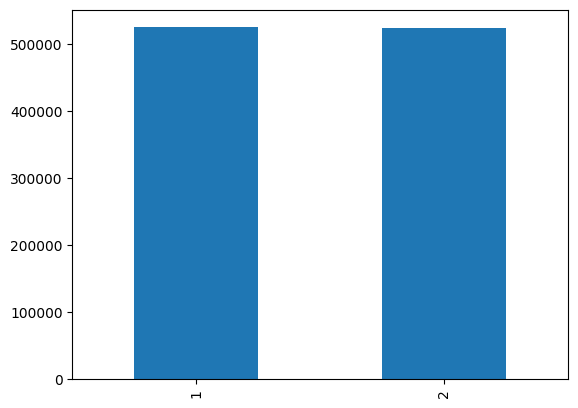

In [5]:
df.SEX.value_counts().plot(kind='bar')

<AxesSubplot: >

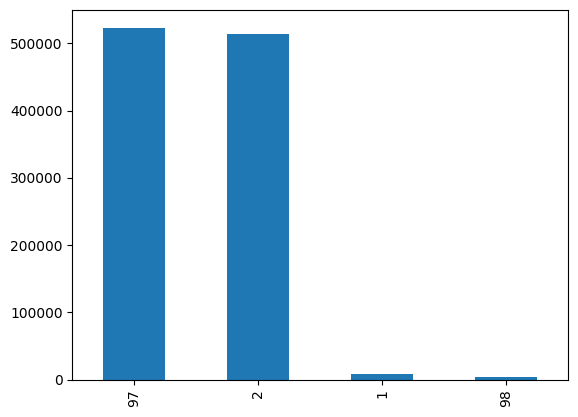

In [6]:
df.PREGNANT.value_counts().plot(kind='bar')

In [7]:
print(
    {
        "Male": df.SEX.value_counts()[2],
        "Pregnant": df.PREGNANT.value_counts()[97]
    }
)
df.SEX.value_counts()[2] == df.PREGNANT.value_counts()[97]


{'Male': 523511, 'Pregnant': 523511}


True

97 dan 99 adalah missing values, maka data harus di normalisasi atau dibersihkan dengan cara menghapus baris yang mengadung value 97 dan 99

In [8]:
CATEGORICAL_COLUMNS = [
    'SEX',
    'USMER',
    'PNEUMONIA',
    'DIABETES',
    'COPD',
    'ASTHMA',
    'INMSUPR',
    'HIPERTENSION',
    'OTHER_DISEASE',
    'CARDIOVASCULAR',
    'OBESITY',
    'RENAL_CHRONIC',
    'TOBACCO',
    'PREGNANT',
]


In [9]:
df.PREGNANT = df.PREGNANT.replace(97,2)

df = df[(df.PREGNANT == 1) | (df.PREGNANT == 2)]

In [10]:
for col in CATEGORICAL_COLUMNS:
    df = df[(df[col] == 1) | (df[col] == 2)]


In [11]:
df.head()

,USMER,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,2,1,03/06/2020,97,1,72,2,2,2,2,2,1,2,2,1,1,2,5,97
2,2,2,2,09/06/2020,1,2,55,2,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,2,1,21/06/2020,97,2,68,2,1,2,2,2,1,2,2,2,2,2,3,97


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021977 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1021977 non-null  int64 
 1   SEX                   1021977 non-null  int64 
 2   PATIENT_TYPE          1021977 non-null  int64 
 3   DATE_DIED             1021977 non-null  object
 4   INTUBED               1021977 non-null  int64 
 5   PNEUMONIA             1021977 non-null  int64 
 6   AGE                   1021977 non-null  int64 
 7   PREGNANT              1021977 non-null  int64 
 8   DIABETES              1021977 non-null  int64 
 9   COPD                  1021977 non-null  int64 
 10  ASTHMA                1021977 non-null  int64 
 11  INMSUPR               1021977 non-null  int64 
 12  HIPERTENSION          1021977 non-null  int64 
 13  OTHER_DISEASE         1021977 non-null  int64 
 14  CARDIOVASCULAR        1021977 non-null  int64 
 15

In [13]:
df.isnull().sum()

USMER                   0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

Melakukan encode data dengan mengubah ke 1 dan 0, tidak = 0 dan ya = 1

In [14]:
def process_categorical_columns(x):
    if x in [np.nan]:
        return np.nan
    if x == 1:
        return x
    else:
        return 0

In [15]:
for categorical in CATEGORICAL_COLUMNS:
    df[categorical] = df[categorical].apply(process_categorical_columns)

df.PATIENT_TYPE = df.PATIENT_TYPE.apply(lambda x: 0 if x == 1 else 1)
df.DATE_DIED = df.DATE_DIED.apply(lambda x: 0 if x == '9999-99-99' else 1)


Karena kolom date_died, intubed, dan icu merupakan kolom decision yang menandakan bahwa pasien terkena covid 19, maka dibuat satu kolom decision dengan mengambil value dari kolom date_died, intubed, dan icu supaya tidak ada duplikasi kolom decision

In [16]:
df['HIGH_RISK'] = df.DATE_DIED 

In [17]:
df.drop(columns=['CLASIFFICATION_FINAL', 'DATE_DIED', 'INTUBED', 'ICU'], inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021977 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   USMER           1021977 non-null  int64
 1   SEX             1021977 non-null  int64
 2   PATIENT_TYPE    1021977 non-null  int64
 3   PNEUMONIA       1021977 non-null  int64
 4   AGE             1021977 non-null  int64
 5   PREGNANT        1021977 non-null  int64
 6   DIABETES        1021977 non-null  int64
 7   COPD            1021977 non-null  int64
 8   ASTHMA          1021977 non-null  int64
 9   INMSUPR         1021977 non-null  int64
 10  HIPERTENSION    1021977 non-null  int64
 11  OTHER_DISEASE   1021977 non-null  int64
 12  CARDIOVASCULAR  1021977 non-null  int64
 13  OBESITY         1021977 non-null  int64
 14  RENAL_CHRONIC   1021977 non-null  int64
 15  TOBACCO         1021977 non-null  int64
 16  HIGH_RISK       1021977 non-null  int64
dtypes: int64(17)
memory usage: 

In [19]:
df.head()

,USMER,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,HIGH_RISK
0,0,1,0,1,65,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,72,0,0,0,0,0,1,0,0,1,1,0,1
2,0,0,1,0,55,0,1,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,53,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,68,0,1,0,0,0,1,0,0,0,0,0,1


In [20]:
df['HIGH_RISK'].value_counts()

0    947320
1     74657
Name: HIGH_RISK, dtype: int64

<AxesSubplot: >

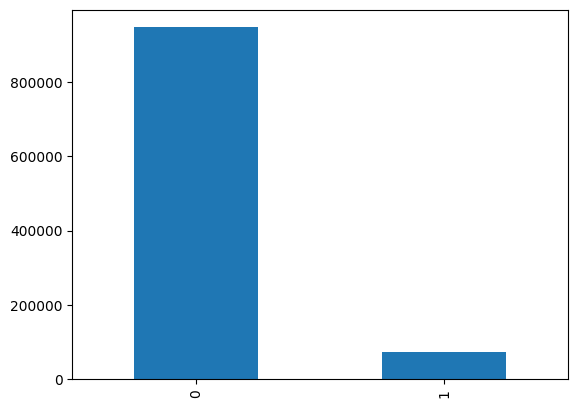

In [21]:
df['HIGH_RISK'].value_counts().plot(kind='bar')

In [22]:
y = df.HIGH_RISK
x = df.drop(columns=['HIGH_RISK'])


In [23]:
rus = RandomUnderSampler()
x_resampled,y_resampled = rus.fit_resample(x,y)

<AxesSubplot: >

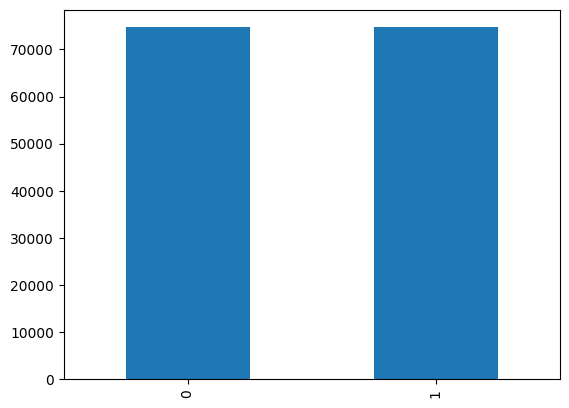

In [24]:
y_resampled.value_counts().plot(kind='bar')

In [25]:
train_x, test_x, train_y, test_y = train_test_split(
    x_resampled.values,
    y_resampled.values,
    test_size=0.25,
)



In [26]:
random_forest = RandomForestClassifier()

In [27]:
model_scores = {}

Random Forest Classifier

In [28]:
model_scores

{}

In [29]:
random_forest.fit(train_x, train_y)
model_scores['Random Forest'] = [
    random_forest.score(train_x, train_y),
    random_forest.score(test_x, test_y)
]


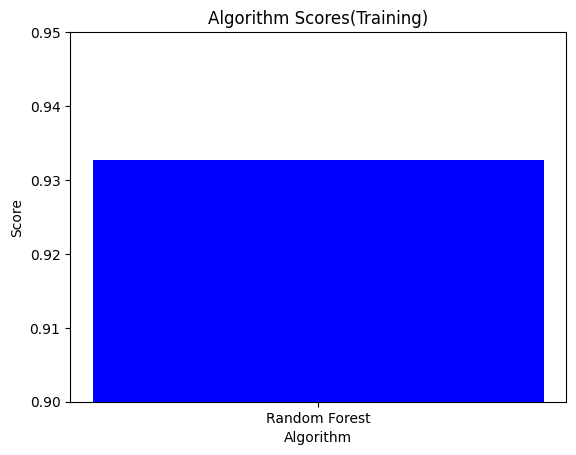

In [30]:
# Draw a plot of the algorithm scores
score_by_training = [model_scores[x][0] for x in model_scores]
score_by_training.sort(reverse=True)
plt.title('Algorithm Scores(Training)')
plt.xlabel('Algorithm')
plt.ylabel('Score')
# 2 decimal places
plt.bar([x for x in model_scores], score_by_training, color='blue')
plt.ylim(0.90, 0.95)
plt.show()


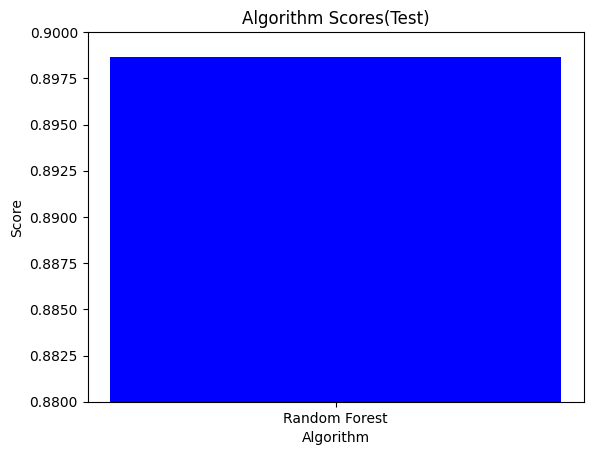

In [31]:
score_by_test = [model_scores[x][1] for x in model_scores]
score_by_test.sort(reverse=True)
plt.title('Algorithm Scores(Test)')
plt.xlabel('Algorithm')
plt.ylabel('Score')
# 2 decimal places
plt.bar([x for x in model_scores], score_by_test, color='blue')
plt.ylim(0.88, 0.9)
plt.show()


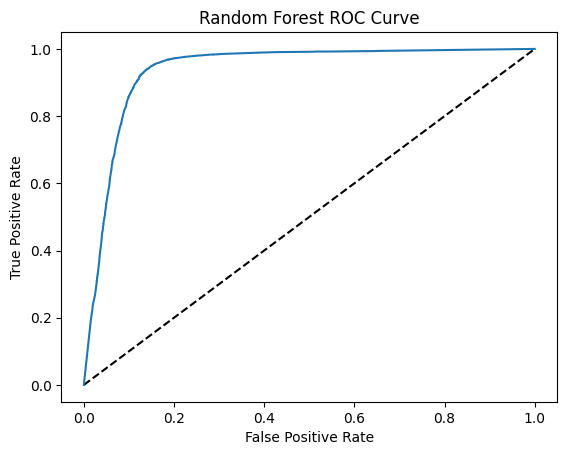

In [32]:
random_forest_pred_proba = random_forest.predict_proba(test_x)
fpr, tpr, thresholds = roc_curve(test_y, random_forest_pred_proba[:,1])
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Random Forest Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.show()

In [33]:
random_forest_prediction = random_forest.predict(test_x)


In [41]:
reports = {}
reports['Random Forest'] = classification_report(random_forest_prediction, test_y, output_dict=True)
print(classification_report(random_forest_prediction, test_y))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     17511
           1       0.93      0.88      0.90     19818

    accuracy                           0.90     37329
   macro avg       0.90      0.90      0.90     37329
weighted avg       0.90      0.90      0.90     37329



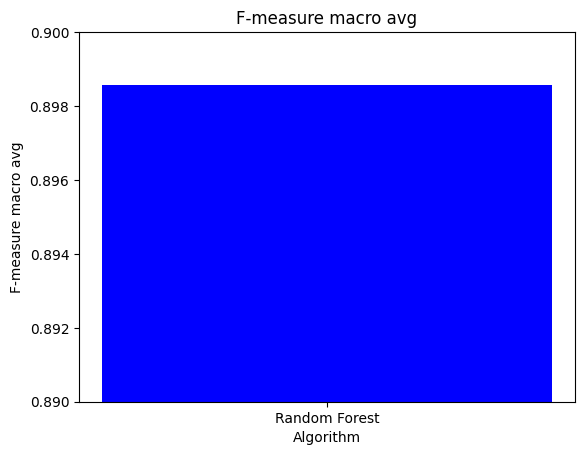

In [35]:
f1_score_by_macro_avg = [reports[x]['macro avg']['f1-score'] for x in reports]

plt.title('F-measure macro avg')
plt.xlabel('Algorithm')
plt.ylabel('F-measure macro avg')
plt.bar([x for x in reports], f1_score_by_macro_avg , color='blue')
plt.ylim(0.89, 0.9)
plt.show()

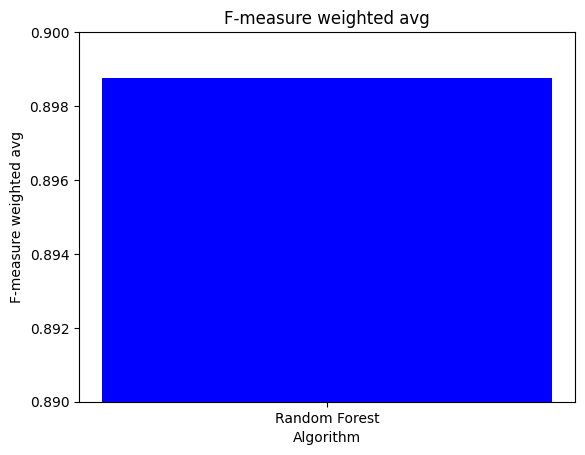

In [36]:
f1_score_by_weigted_avg = [reports[x]['weighted avg']['f1-score'] for x in reports]

plt.title('F-measure weighted avg')
plt.xlabel('Algorithm')
plt.ylabel('F-measure weighted avg')
plt.bar([x for x in reports], f1_score_by_weigted_avg, color='blue')
plt.ylim(0.89, 0.9)
plt.show()

In [37]:
reports

{'Random Forest': {'0': {'precision': 0.867727418836387,
   'recall': 0.9249614528010964,
   'f1-score': 0.8954307985736794,
   'support': 17511},
  '1': {'precision': 0.9295933129721909,
   'recall': 0.8754162882228277,
   'f1-score': 0.9016917439775473,
   'support': 19818},
  'accuracy': 0.8986578799324921,
  'macro avg': {'precision': 0.898660365904289,
   'recall': 0.9001888705119621,
   'f1-score': 0.8985612712756132,
   'support': 37329},
  'weighted avg': {'precision': 0.900572078216048,
   'recall': 0.8986578799324921,
   'f1-score': 0.8987547401744148,
   'support': 37329}}}

In [38]:
score_by_training.sort()

In [39]:
import joblib
joblib.dump(random_forest, 'random_forest.pkl', compress=3)

['random_forest.pkl']